In [ ]:
!pip install openai matplotlib pandas requests --quiet


In [ ]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def fetch_eth_7_day():
    url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart"
    params = {"vs_currency": "usd", "days": "7", "interval": "daily"}
    response = requests.get(url, params=params).json()

    prices = response['prices']
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
    df.set_index('date', inplace=True)
    df.drop("timestamp", axis=1, inplace=True)
    return df


In [ ]:
def plot_price(df):
    plt.figure(figsize=(10,5))
    plt.plot(df.index, df['price'], marker='o', linestyle='-')
    plt.title("Ethereum Price Trend (Last 7 Days)")
    plt.xlabel("Date")
    plt.ylabel("Price in USD")
    plt.grid(True)
    plt.show()


In [ ]:
from openai import OpenAI

client = OpenAI(api_key="sk-p***")  # 🔁 Put your actual API key here

def get_gpt_advice(df):
    price_list = df['price'].round(2).tolist()
    context = f"The last 7 days' Ethereum prices are: {price_list}. Provide a financial trend analysis and investment advice in simple English for a beginner investor."

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": context}],
        temperature=0.7
    )

    return response.choices[0].message.content


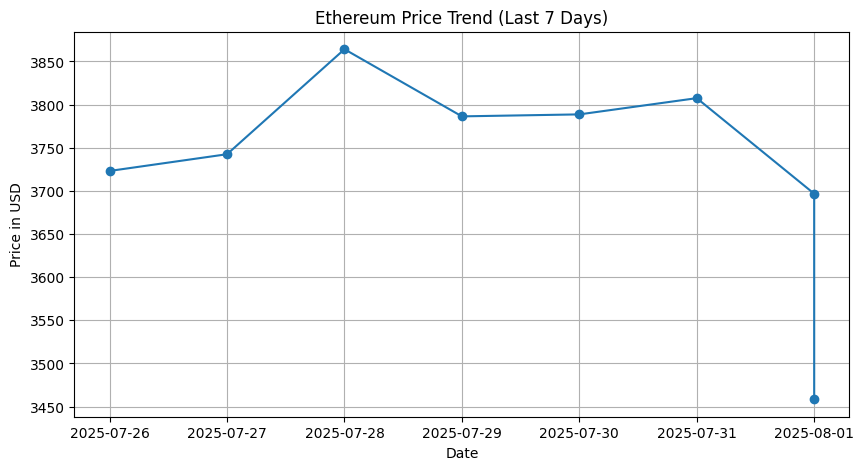

💡 GPT Investment Advice:

Financial Trend Analysis:

In the last seven days, Ethereum's price has experienced significant fluctuations, indicating volatility in the market. The price rose from $3723.05 to peak at $3864.12, then fell sharply to $3458.48. Overall, the price trend has been downward in the last few days. 

Investment Advice:

As a beginner investor, you should understand that investments in cryptocurrency are highly volatile and can be risky. The declining trend in Ethereum prices suggests a bearish market, but it doesn't necessarily mean it will continue to drop. 

Before investing, make sure you thoroughly research and understand the market dynamics. You should only invest money you can afford to lose, and it's advisable to diversify your investments rather than put all your funds into one asset. 

Remember, short-term fluctuations shouldn't affect long-term investment strategies. If you believe in the long-term potential of Ethereum, these dips could be seen as buying o

In [ ]:
# Fetch
eth_df = fetch_eth_7_day()

# Plot
plot_price(eth_df)

# Advice
advice = get_gpt_advice(eth_df)
print("💡 GPT Investment Advice:\n")
print(advice)
